<a href="https://colab.research.google.com/github/j96k/data-analytics/blob/main/COVID_19_TIMELINE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WORLD WIDE COVID-19 ANALYSIS**


# **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as p
import warnings

# **Get the data**

In [4]:
dataset = pd.read_csv("owid-covid-data.csv")
print("Data imported successfully")

Data imported successfully


# **Preprocessing Data**

In [5]:
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,0.0,0.126,0.000,0.018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,0.0,0.126,0.000,0.018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,0.0,0.126,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,0.0,0.126,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
9,AFG,Asia,Afghanistan,2020-03-

In [6]:
dataset.dtypes

iso_code                       object
continent                      object
location                       object
date                           object
total_cases                   float64
                               ...   
handwashing_facilities        float64
hospital_beds_per_thousand    float64
life_expectancy               float64
human_development_index       float64
excess_mortality              float64
Length: 62, dtype: object

In [7]:
dataset.shape

(117670, 62)

In [8]:
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,1.118830e+05,111880.000000,110865.000000,1.012010e+05,101356.000000,110865.000000,111293.000000,111290.000000,110280.000000,100624.000000,100779.000000,110280.000000,94434.000000,13337.000000,13337.000000,15309.000000,15309.000000,1177.000000,1177.000000,2144.000000,2144.000000,5.105100e+04,5.090500e+04,50905.000000,51051.000000,6.050100e+04,60501.000000,57240.000000,56614.000000,2.585500e+04,2.472600e+04,2.172300e+04,2.290000e+03,2.140100e+04,4.607800e+04,25855.000000,24726.000000,21723.000000,2290.000000,46078.000000,97416.000000,1.168660e+05,108804.000000,104015.000000,102857.000000,103444.000000,104601.000000,70245.000000,104316.000000,107469.000000,81469.000000,80285.000000,52401.000000,94870.000000,111623.000000,104407.000000,4007.000000
mean,1.371250e+06,6442.846344,6454.522953,3.512174e+04,145.972986,132.718240,16909.780898,81.975569,81.926368,357.132792,1.546695,1.402065,1.009027,937.176801,22.370641,4260.536351,150.282491,223.385596,16.899822,3015.983688,89.409938,5.339103e+04,1.008881e+07,422.031769,2.384610,5.025594e+04,2.272267,0.087867,160.899896,6.217914e+07,3.310898e+07,2.015866e+07,9.992754e+05,8.224557e+05,3.912259e+05,40.968497,24.786667,18.324487,1.346651,3500.769109,57.253343,1.229532e+08,395.908921,30.529677,8.768241,5.548406,19262.954291,13.468564,259.145005,8.002367,10.597201,32.731812,50.752713,3.024811,73.258958,0.726654,18.042214
std,9.208012e+06,39392.330410,38955.655324,2.094253e+05,795.904714,743.746439,29176.085394,191.299654,161.973216,612.124302,3.965744,2.983047,0.348262,2871.883660,25.436880,11781.340343,197.897377,509.335148,32.036534,10306.198659,188.271169,1.887211e+05,4.267352e+07,1026.364911,6.596713,1.706596e+05,5.522441,0.097271,854.812834,3.494994e+08,1.905708e+08,1.195342e+08,2.839081e+06,3.813064e+06,2.574565e+06,43.432480,23.671361,20.642610,4.153553,4407.109679,20.776650,6.780415e+08,1843.650781,9.126192,6.196245,4.225492,20054.222484,19.979563,119.288885,4.260216,10.506487,13.499641,31.753935,2.453837,7.544832,0.150253,35.085082
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,-75.911000,-10.844000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.854500e+03,3.000000,8.857000,6.400000e+01,0.000000,0.000000,323.918000,0.275000,1.501000,9.814000,0.000000,0.000000,0.840000,24.000000,3.317000,106.000000,20.374000,6.003000,1.304000,37.984500,8.0987

In [9]:
dataset.isnull().sum()

iso_code                           0
continent                       5380
location                           0
date                               0
total_cases                     5787
                               ...  
handwashing_facilities         65269
hospital_beds_per_thousand     22800
life_expectancy                 6047
human_development_index        13263
excess_mortality              113663
Length: 62, dtype: int64

In [10]:
data = dataset[dataset['date']=='2020-11-15']
data = data[~data['location'].isin(['World','International'])]
data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
265,AFG,Asia,Afghanistan,2020-11-15,43035.0,66.0,143.143,1605.0,10.0,7.000,1080.320,1.657,3.593,40.291,0.251,0.176,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,3.983543e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,NaN
849,OWID_AFR,NaN,Africa,2020-11-15,1976011.0,12568.0,13307.857,47362.0,296.0,286.000,1438.683,9.150,9.689,34.483,0.216,0.208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,9686.961,207.802,180.204,216.851,3.829,3.182,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2106.0,147986.0,51.510,0.733,1906.0,0.663,0.272,3.7,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,2.872934e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1993,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,1516.901,19.275,18.020,48.278,0.336,0.339,1.35,44.0,0.986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,4.461663e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,NaN
2559,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,75910.748,1900.354,903.084,982.496,12.928,1.847,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,772.0,9.980,0.090,11.1,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.26,7.735400e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,NaN
3107,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,396.392,2.269,4.286,9.489,0.000,0.063,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.19,3.393361e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,NaN
3888,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,1357.264,0.000,4.341,40.515,0.000,1.447,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.872800e+04,231.845,32.1,6.933,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778,NaN
4515,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,28735.168,123.778,213.973,777.006,2.829,5.876,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10804.0,3459859.0,75.864,0.237,20996.0,0.460,0.247,4.0,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.17,4.560582e+07,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76


# **Data Visualization**

### **Showing Total Deaths rate in the World map**

In [12]:
fig = p.choropleth(data, locations="iso_code", color="total_deaths", hover_name='location', color_continuous_scale="reds",
                   title='Total Covid19 deaths in World')
fig.show()


### **Top 10 Countries New Covid Cases Wise**

In [13]:
top_10_countries_by_new_cases = data.sort_values("new_cases",ascending= False)
top_10_countries_by_new_cases.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
35667,OWID_EUR,NaN,Europe,2020-11-15,14004897.0,200180.0,259235.286,323692.0,2956.0,4233.143,18729.449,267.711,346.688,432.890,3.953,5.661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.477474e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78097,OWID_NAM,NaN,North America,2020-11-15,13168473.0,147437.0,165405.857,372746.0,1160.0,1793.429,22073.225,247.136,277.256,624.803,1.944,3.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.965813e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111813,USA,North America,United States,2020-11-15,11152078.0,137018.0,151364.857,247500.0,780.0,1166.000,33498.267,411.570,454.665,743.433,2.343,3.502,1.22,16808.0,50.487,69502.0,208.768,NaN,NaN,71682.000,215.316,1196585.0,177246035.0,532.406,3.594,1586087.0,4.764,0.095,10.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.28,3.329151e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,27.90
36272,OWID_EUN,NaN,European Union,2020-11-15,9379724.0,132080.0,184642.714,215671.0,2112.0,3031.000,20974.811,295.355,412.896,482.281,4.723,6.778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.471899e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5860,OWID_ASI,NaN,Asia,2020-11-15,15118481.0,81773.0,93786.143,266654.0,1518.0,1556.857,3230.679,17.474,20.041,56.981,0.324,0.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.679661e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53242,ITA,Europe,Italy,2020-11-15,1178529.0,33977.0,34775.000,45229.0,546.0,547.857,19522.584,562.836,576.055,749.228,9.045,9.075,1.07,3422.0,56.686,35469.0,587.552,NaN,NaN,17216.041,285.187,195275.0,18878386.0,312.724,3.235,214810.0,3.558,0.162,6.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.63,6.036747e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,54.06
98102,OWID_SAM,NaN,South America,2020-11-15,10345096.0,32500.0,51460.429,362754.0,658.0,1126.571,23822.348,74.840,118.501,835.338,1.515,2.594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.342601e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48954,IND,Asia,India,2020-11-15,8845127.0,30548.0,41638.571,130070.0,435.0,494.143,6347.832,21.923,29.883,93.347,0.312,0.355,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,805589.0,124836819.0,89.591,0.578,1014290.0,0.728,0.041,24.4,samples tested,NaN,Na

### **Top 10 Countries Total Death Wise**

In [14]:

top_10_countries_by_most_deaths = data.sort_values("total_deaths",ascending =False)
top_10_countries_by_most_deaths.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
78097,OWID_NAM,NaN,North America,2020-11-15,13168473.0,147437.0,165405.857,372746.0,1160.0,1793.429,22073.225,247.136,277.256,624.803,1.944,3.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.965813e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98102,OWID_SAM,NaN,South America,2020-11-15,10345096.0,32500.0,51460.429,362754.0,658.0,1126.571,23822.348,74.840,118.501,835.338,1.515,2.594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.342601e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35667,OWID_EUR,NaN,Europe,2020-11-15,14004897.0,200180.0,259235.286,323692.0,2956.0,4233.143,18729.449,267.711,346.688,432.890,3.953,5.661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.477474e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5860,OWID_ASI,NaN,Asia,2020-11-15,15118481.0,81773.0,93786.143,266654.0,1518.0,1556.857,3230.679,17.474,20.041,56.981,0.324,0.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.679661e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111813,USA,North America,United States,2020-11-15,11152078.0,137018.0,151364.857,247500.0,780.0,1166.000,33498.267,411.570,454.665,743.433,2.343,3.502,1.22,16808.0,50.487,69502.0,208.768,NaN,NaN,71682.0,215.316,1196585.0,177246035.0,532.406,3.594,1586087.0,4.764,0.095,10.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.28,3.329151e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,27.90
36272,OWID_EUN,NaN,European Union,2020-11-15,9379724.0,132080.0,184642.714,215671.0,2112.0,3031.000,20974.811,295.355,412.896,482.281,4.723,6.778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.471899e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15289,BRA,South America,Brazil,2020-11-15,5863093.0,14134.0,28425.429,165798.0,140.0,485.857,27398.471,66.049,132.833,774.781,0.654,2.270,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.17,2.139934e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
48954,IND,Asia,India,2020-11-15,8845127.0,30548.0,41638.571,130070.0,435.0,494.143,6347.832,21.923,29.883,93.347,0.312,0.355,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,805589.0,124836819.0,89.591,0.578,1014290.0,0.728,0.041,24.4,samples tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.57,1.393409e+09,450.4

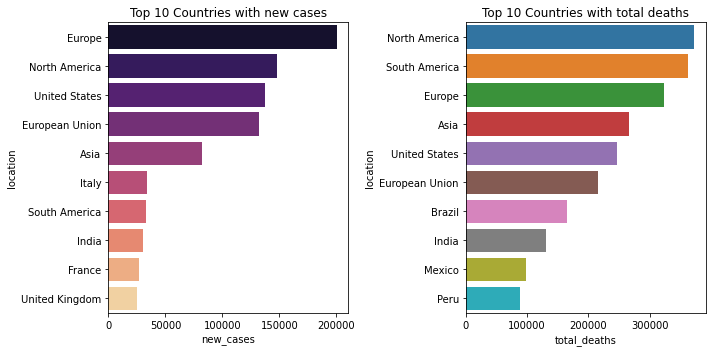

In [15]:
fig,axes = plt.subplots(figsize=(10,5),nrows =1, ncols = 2)
sns.barplot(x =top_10_countries_by_new_cases["new_cases"][:10], y =top_10_countries_by_new_cases["location"][:10],
           ax = axes[0], palette ="magma");
axes[0].set_title("Top 10 Countries with new cases")
sns.barplot(x = top_10_countries_by_most_deaths["total_deaths"][:10], y = top_10_countries_by_most_deaths["location"][:10],
           ax =axes[1])
axes[1].set_title("Top 10 Countries with total deaths")
fig.tight_layout()

-From the above graph we can say that the United States has the most number of new cases and after that India and Brazil follows up.

-From the second graph we can say that again in the United States most number of deaths occured due to COVID-19 and then Brazil and India follows up.

In [16]:
top_10_countries_by_most_deaths ['location'].tail(10)

58615                                 Laos
67014                     Marshall Islands
70672                             Mongolia
88846                Saint Kitts and Nevis
89954     Saint Vincent and the Grenadines
93617                           Seychelles
96385                      Solomon Islands
106102                               Timor
113234                             Vanuatu
113796                             Vatican
Name: location, dtype: object

In [17]:
data_asia = data[data['continent'] =='Asia']
data_asia = data_asia[~data_asia['location'].isin(['World','International'])]
data_asia.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
265,AFG,Asia,Afghanistan,2020-11-15,43035.0,66.0,143.143,1605.0,10.0,7.000,1080.320,1.657,3.593,40.291,0.251,0.176,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,3.983543e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,NaN
5082,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,39532.325,499.305,525.247,593.977,8.423,9.819,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3640.0,1.226,0.428,2.3,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.968128e+06,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776,NaN
7601,AZE,Asia,Azerbaijan,2020-11-15,75688.0,2259.0,1468.143,967.0,21.0,18.143,7403.448,220.965,143.607,94.587,2.054,1.775,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,1.022334e+07,119.309,32.4,6.018,3.871,15847.419,NaN,559.812,7.11,0.3,42.5,83.241,4.70,73.00,0.756,NaN
8726,BHR,Asia,Bahrain,2020-11-15,84703.0,180.0,178.143,334.0,1.0,0.714,48448.917,102.957,101.895,191.043,0.572,0.409,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8805.0,1894421.0,1083.582,5.036,10118.0,5.787,0.018,56.8,units unclear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.63,1.748295e+06,1935.907,32.4,2.372,1.387,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.00,77.29,0.852,NaN
9291,BGD,Asia,Bangladesh,2020-11-15,432333.0,1837.0,1727.857,6194.0,21.0,18.143,2599.663,11.046,10.390,37.245,0.126,0.109,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14060.0,2539021.0,15.267,0.085,14085.0,0.085,0.123,8.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.09,1.663035e+08,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632,NaN
12914,BTN,Asia,Bhutan,2020-11-15,375.0,0.0,2.286,NaN,NaN,0.000,480.831,0.000,2.931,NaN,NaN,0.000,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1461.0,188891.0,242.199,1.873,1064.0,1.364,0.002,465.4,samples tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.67,7.799000e+05,21.188,28.6,4.885,2.977,8708.597,1.5,217.066,9.75,NaN,NaN,79.807,1.70,71.78,0.654,NaN
15954,BRN,Asia,Brunei,2020-11-15,148.0,0.0,0.000,3.0,0.0,0.000,335.197,0.000,0.000,6.795,0.000,0.000,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.19,4.415320e+05,81.347,32.4,4.591,2.382,71809.251,NaN,201.285,12.79,2.0,30.9,NaN,2.70,75.86,0.838,NaN
18210,KHM,Asia,Cambodia,2020-11-15,302.0,0.0,0.714,NaN,NaN,0.000,17.821,0.000,0.042,NaN,NaN,0.000,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.59,1.694645e+07,90.672,25.6,4.412,2.385,3645.070,NaN,270.892,4.00,2.0,33.7,

In [18]:
df_asia=data_asia[["date","total_cases","new_cases","total_deaths","new_tests","total_tests",
                  "location",'new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'positive_rate','new_deaths']]
df_asia.head(10)

,date,total_cases,new_cases,total_deaths,new_tests,total_tests,location,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,new_deaths
265,2020-11-15,43035.0,66.0,1605.0,NaN,NaN,Afghanistan,0.251,NaN,NaN,NaN,10.0
5082,2020-11-15,117337.0,1482.0,1763.0,NaN,NaN,Armenia,8.423,NaN,NaN,0.428,25.0
7601,2020-11-15,75688.0,2259.0,967.0,NaN,NaN,Azerbaijan,2.054,NaN,NaN,NaN,21.0
8726,2020-11-15,84703.0,180.0,334.0,8805.0,1894421.0,Bahrain,0.572,1083.582,5.036,0.018,1.0
9291,2020-11-15,432333.0,1837.0,6194.0,14060.0,2539021.0,Bangladesh,0.126,15.267,0.085,0.123,21.0
12914,2020-11-15,375.0,0.0,NaN,1461.0,188891.0,Bhutan,NaN,242.199,1.873,0.002,NaN
15954,2020-11-15,148.0,0.0,3.0,NaN,NaN,Brunei,0.000,NaN,NaN,NaN,0.0
18210,2020-11-15,302.0,0.0,NaN,NaN,NaN,Cambodia,NaN,NaN,NaN,NaN,NaN
22469,2020-11-15,86392.0,8.0,4634.0,NaN,NaN,China,0.000,NaN,NaN,NaN,0.0
40272,2020-11-15,79678.0,3020.0,703.0,NaN,NaN,Georgia,8.543,NaN,NaN,NaN,34.0


### **Heatmap Showing Correlation of dataset**

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

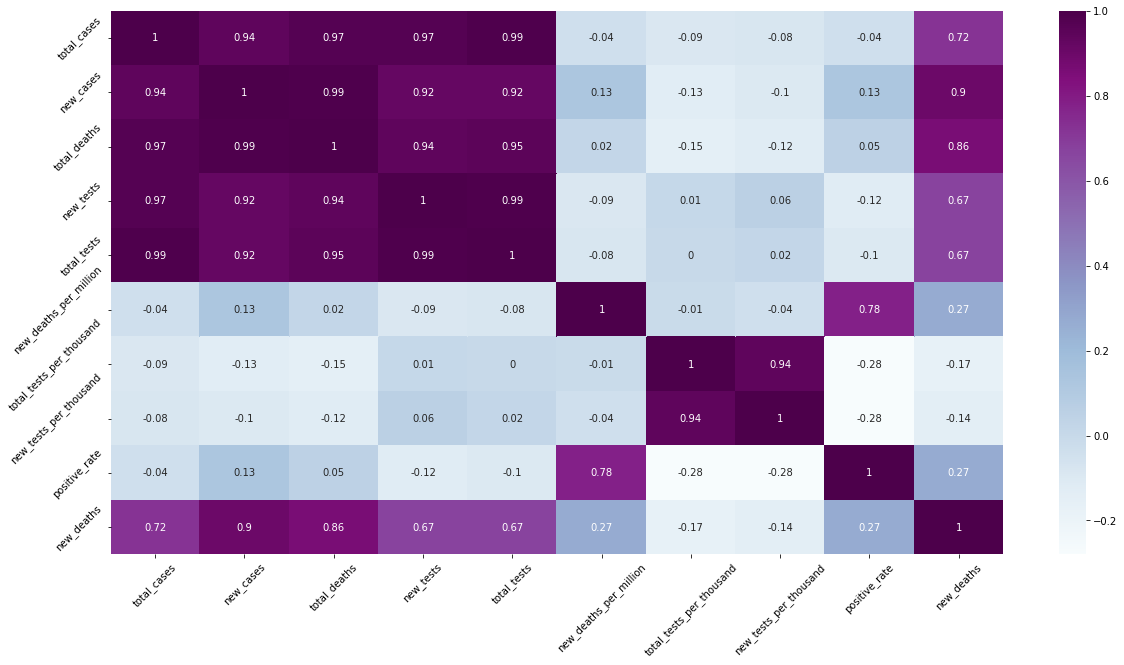

In [21]:
plt.figure(figsize= (20,10))
sns.heatmap(np.round(df_asia.corr(),2),annot= True,cmap='BuPu')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

### **Top 10 countries with most cases and least cases**

In [25]:
asia_cases = df_asia.sort_values('total_cases',ascending = False)
asia_cases1 = df_asia.sort_values('total_cases',ascending = True)

Text(0.5, 1.0, 'Top 10 Countries(Asia) with most cases')

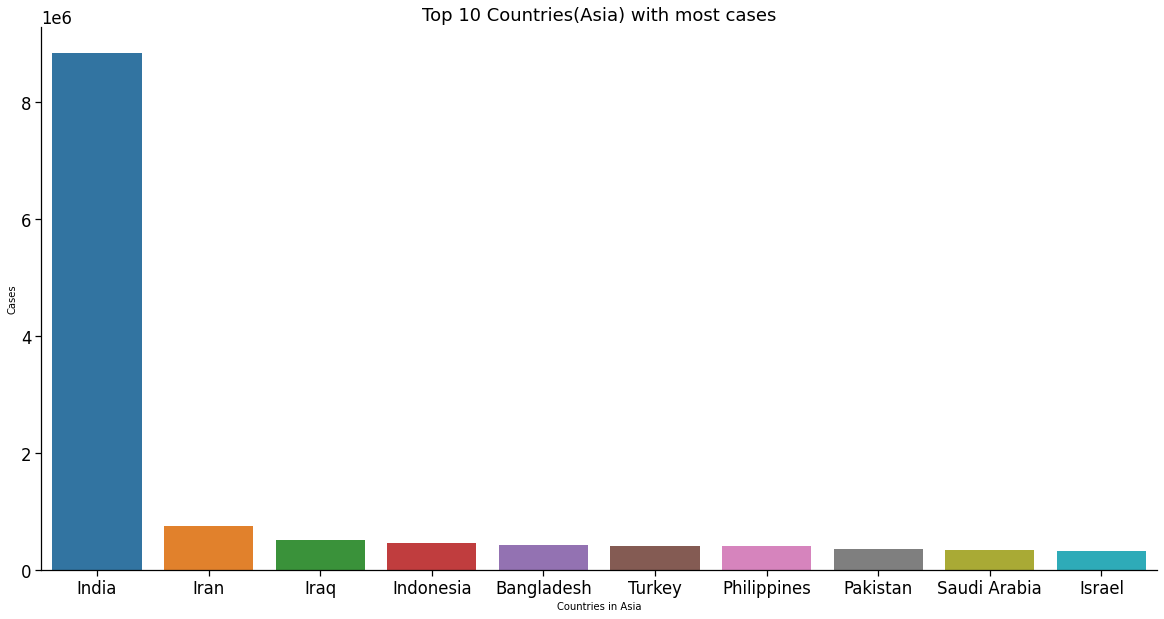

In [26]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="location", y="total_cases", data=asia_cases.head(10))
ax.set_ylabel(ylabel = 'Cases', fontsize = 10)
ax.set_xlabel(xlabel = 'Countries in Asia', fontsize = 10)
ax.set_title('Top 10 Countries(Asia) with most cases')

*India is the country with most cases in Asia*

---



Text(0.5, 1.0, 'Top 10 Countries(Asia) with least cases')

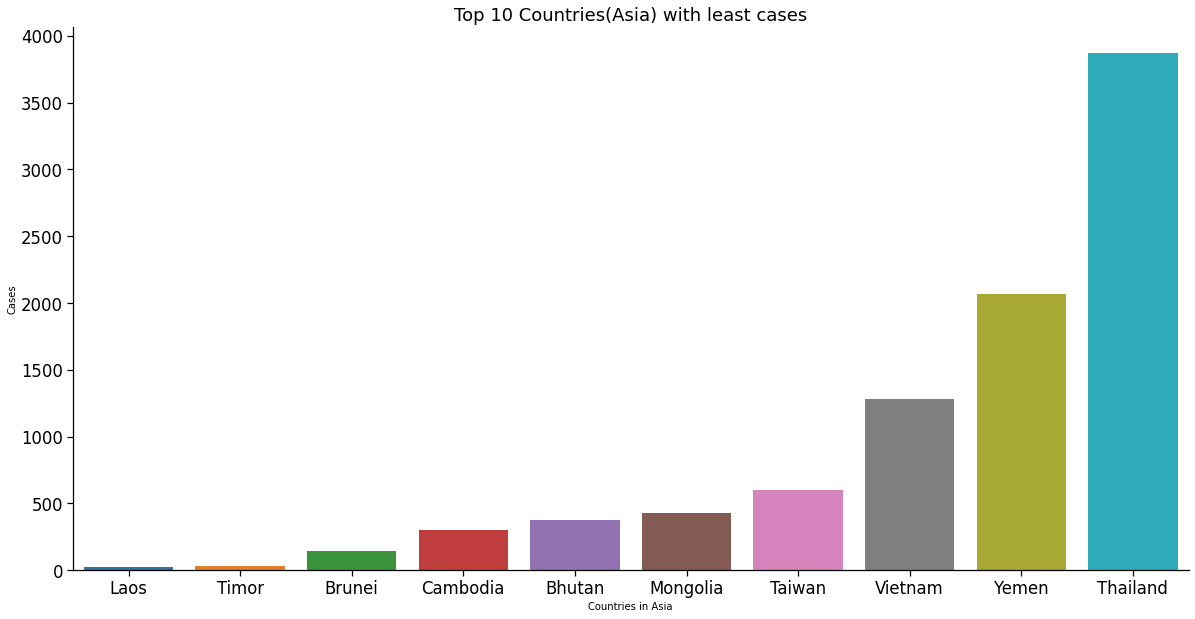

In [27]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="location", y="total_cases", data=asia_cases1.head(10))
ax.set_ylabel(ylabel = 'Cases', fontsize = 10)
ax.set_xlabel(xlabel = 'Countries in Asia', fontsize = 10)
ax.set_title('Top 10 Countries(Asia) with least cases')

*According to the above bar graph we can conclude that in Asia India has most number of cases followed by Iran and Iraq. Laos, Timor and Brunei has least cases in Asia*

### **Line Graph of Total Cases vs Total Deaths**

Text(0.5, 1.0, 'Total Cases vs Total Deaths')

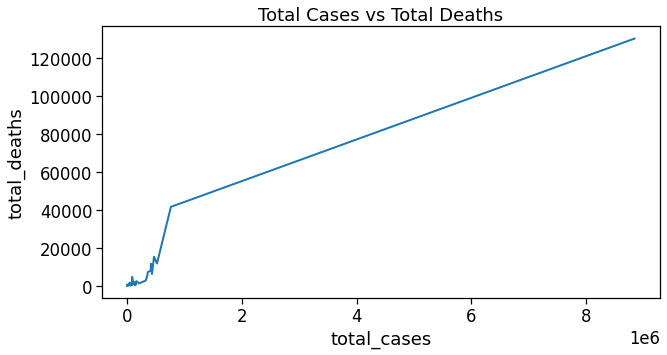

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_cases',y='total_deaths',data=df_asia)
plt.title("Total Cases vs Total Deaths")


-From the above graph we can say that as the total cases increases the total deaths are also increasing


### **Line Graph of Total Deaths Vs New Deaths Per Million**

Text(0.5, 1.0, 'Total Deaths vs New Deaths per million')

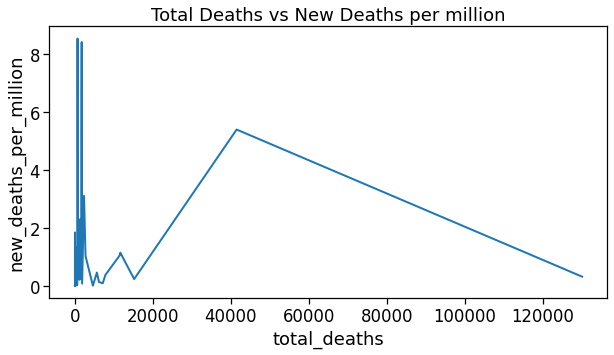

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_deaths',y='new_deaths_per_million',data=df_asia)
plt.title("Total Deaths vs New Deaths per million")


-From the above graph we can say that, new deaths per million population had increased very steeply in the beginning. Around 4000 cases approximately number of deaths started increasing slowly and after 41000 deaths approximately it started falling.

### **Line Graph of Total Tests and Positive Rate**

Text(0.5, 1.0, 'Total Tests vs Positive Rate')

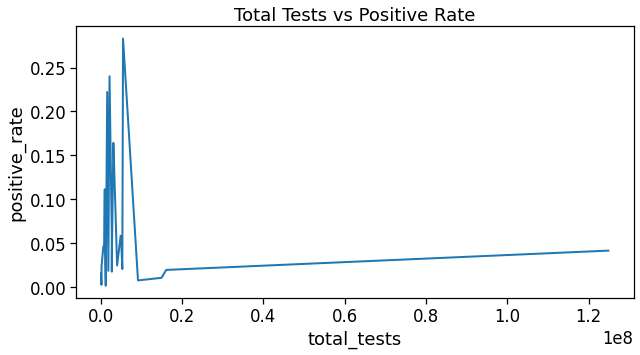

In [30]:

plt.figure(figsize=(10,5))
sns.lineplot(x='total_tests',y='positive_rate',data=df_asia)
plt.title("Total Tests vs Positive Rate")


-From the above line graph we can say that, in the beginning as the number of tests were being done the positive rate also had increased but it decreased after around 1 le8 and after that it has been gradualy increasing.


# **Conclusion**


-As the cases increases the death rate increases.Countries having hih population suffers more.